In [315]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
# from sklearn.utils import check_arrays

In [316]:
df=pd.read_csv("AdmissionDataset/data.csv")
df
X =df.drop(['Chance of Admit ','Serial No.'],axis=1)
y=df['Chance of Admit ']


*Standardizing consists in subtracting the mean and dividing by the standard deviation.*
*The convention that you standardize predictions primarily exists so that the units of the regression coefficients are the same.*
*when value are largely diffrent one is population and some other attribute is fraction*

In [317]:
X = (X - X.mean())/X.std()#normalize the data(z-mu)/(sigma)
# y=(y-y.mean())/y.std()
#kyuki actual y ke paas pahuchna hai isliye ,jhe y ko normalize karne ka koi reason nahi lag raha

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
my_data=pd.concat([X_train,y_train],axis=1)

In [319]:
X=X_train

In [320]:
ones = np.ones([X.shape[0],1])


In [321]:
X = np.concatenate((ones,X),axis=1)


*values converts it from pandas.core.frame.DataFrame to numpy.ndarray*

In [322]:
y
y=pd.DataFrame(y_train)
y=y.values

*basically assumed m=0 and c=0 for each independent variable intially*

In [323]:
theta = np.zeros([1,8])

# theta

*learning rate needed along with direction*

In [324]:
#set hyper parameters
alpha = 0.01

*no of times we have to iterate to minimize rms*

In [325]:
iters = 1000

In [326]:
cost=[]
def computeCost(X,y,theta):
    squareError = np.power(((X @ theta.T)-y),2)
    return np.sum(squareError)/(2 * len(X))

*Calculating Gradient desent for MSE for predicting best theta values*

In [327]:
def gradientDescent(X,y,theta,iters,alpha):
#     cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost.append(computeCost(X, y, theta))
#         cost[i] = computeCost(X, y, theta)
    
    return theta

g = gradientDescent(X,y,theta,iters,alpha)
g1=gradientDescentMeanAbsolute(X,y,theta,iters,alpha)


*Calculated Theta List*

In [328]:
betaList=g[0]

Text(0.5, 1.0, 'Iteration vs Error')

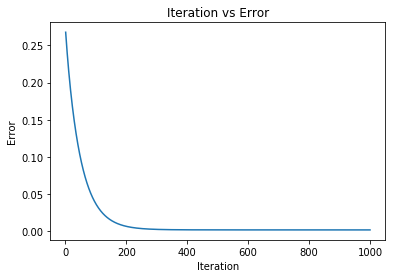

In [329]:
x_axis = [i for i in range(1,1001)]
fig, ax = plt.subplots()
ax.plot(x_axis,cost)
# ax.legend(loc=1) # upper left corner
ax.set_xlabel("Iteration", fontsize=10)
ax.set_ylabel("Error", fontsize=10)
ax.set_title('Iteration vs Error')